# 18-739: Jan 23 Tutorial

All information about python, from downloading to documentation, can be found here: https://www.python.org. 


**Python 2 & Python 3:** We require Python 3 in this course, because that's usually what we use in our starter code.

**Conda**: Easy to manage your multiple python environments
* Conda builds up a virtual environment for a specific python version which will be isolated from your own python on the computer 
* Install pkgs, libs, and everything related to python in your virtual environment. Once you accidentally break your python env, just delete and create a new environment. 
* All information about conda installation can be found here: [https://docs.anaconda.com/anaconda/](https://docs.anaconda.com/anaconda/)

**Jupyter:** Interactive coding with python.
* Useful if you want to run just certain parts of your code
* Easy to document your code and design decisions
* Can be installed within your conda environment

## Numpy

In [1]:
import numpy as np

x = np.random.randint(0, 100, 20)
print(x)

[36  3 48 66 53 92 99 54  0 89 77 57 78  5 29 72 62 64 73  6]


In [3]:
# Do not write code with loops like this
counter = 0
for i in x:
  if i > 75:
    counter += 1
print(counter)

# A better way to increase the readability 
# and to simplify your code
# Number of elements over 75.
(x > 75).sum()

7


7

In [4]:
(x > 75)

array([ True,  True, False,  True, False, False,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
        True,  True])

In [0]:
# Top 5 elements.
x[x.argsort()[-5:]]

array([80, 81, 92, 94, 97])

In [5]:
x.argsort()[-5:]

array([ 0, 18,  1, 19,  3])

In [0]:
# Even Values.
x[x % 2 == 0]

array([36, 92, 80, 94, 46, 22,  6, 10,  0, 34, 40, 18])

In [6]:
x % 2

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0])

In [7]:
x % 2 == 0

array([False, False,  True, False, False,  True,  True, False,  True,
       False, False, False,  True, False,  True, False, False, False,
       False,  True])

In [9]:
x = np.array([0, 1, 2, 3, 4, 5, 6])

# Return elements with an even index

# Do not write code like this
result = []
for i, e in enumerate(x):
  if i % 2 == 0:
    result.append(e)

print(np.array(result))

# Use the view function of numpy arrays
print(x[::2])

[0 2 4 6]
[0 2 4 6]


In [0]:
# Closest number to 69.
x[abs(x - 69).argmin()]

80

In [9]:
abs(x - 69)

array([12, 20, 55, 30, 64, 33,  9, 48, 21,  8, 20, 48,  7, 68, 31, 26, 58,
       34, 12, 25])

In [12]:
abs(x - 69).argmin()

12

In [13]:
# Accuracy of prediction.
y_hat = np.array([
    [1,2,3],
    [2,1,3],
    [3,1,2],
    [1,3,2],
    [1,2,3]])

y = [2,0,0,1,1]

(y_hat.argmax(axis=1) == y).mean()

0.6

In [14]:
y_hat.argmax(axis=1)

array([2, 2, 0, 1, 2])

In [17]:
y_hat.argmax(axis=0)

array([2, 3, 0])

In [18]:
y_hat.argmax()

2

In [15]:
y_hat.argmax(axis=1) == y

array([ True, False,  True,  True, False])

### Documentation for a command:

In [19]:
np.argmax?

## Introduction to Tensorflow

### Tensorflow 

TensorFlow is an end-to-end open source platform for machine learning. It has a comprehensive, flexible ecosystem of tools, libraries and community resources that lets researchers push the state-of-the-art in ML and developers easily build and deploy ML powered applications. 

![alt text](https://www.tensorflow.org/images/tensors_flowing.gif)


### Step One: Build the graph

## Here shows an example of a computation graph for $x^2y + y + 2$

![alt text](https://www.oreilly.com/library/view/getting-started-with/9781491978757/assets/mlst_0901.png)


For a Logistic Regression model, the graph looks like ![alt text](https://machinethink.net/images/tensorflow-on-ios/ComputationalGraph@2x.png)

### Step Two: Open a session and execute the graph

Before you execute the graph, you will receive only a symbolic tensor even if you define it with a real value: 


In [2]:
# %tensorflow_version 1.x -- magic function available to check version on google cloud
import tensorflow as tf
a = 2
b = 3
c = tf.add(a, b, name='Add')
print(c)

Tensor("Add:0", shape=(), dtype=int32)


Only if you execute the graph inside a session will you be able to compute the actual value of c

In [26]:
a = 2
b = 3
c = tf.add(a, b, name='Add')
with tf.Session() as sess:
  c_value = sess.run([c])

print(c_value[0])

5


## TensorFlow

In [28]:
# %tensorflow_version 1.x -- magic function available to check version on google cloud

import numpy as np
import tensorflow as tf

from tensorflow.data import Dataset


'''Make a pipeline for a quadratic function Ax**2 + Bx + c.'''

n = 3
d_in = 5
d_out = 4

# Make some variables.
tf.reset_default_graph()

A = tf.get_variable('A', [d_in, d_out])
B = tf.get_variable('B', [d_in, d_out])
c = tf.get_variable('c', [d_out], initializer=tf.zeros_initializer)

# View your variables.
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    print('A: {}\nB: {}\nc: {}\n'.format(*sess.run([A, B, c])))

# Make a graph.
X = tf.placeholder(tf.float32, [None, d_in])

f = tf.matmul(X**2, A) + tf.matmul(X, B) + c

data = np.ones((n, d_in)).astype('float32')

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    print('f: {}\n'.format(sess.run(f, {X: data})))

# Using tf Dataset.
def f(X):
    return tf.matmul(X**2, A) + tf.matmul(X, B) + c

dataset = Dataset.from_tensors(data)
iterator = dataset.make_initializable_iterator()

X = iterator.get_next()

res = f(X)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(iterator.initializer)
    
    print('f: {}\n'.format(sess.run(res)))
    

A: [[-0.7262941   0.4964689   0.00775653 -0.42427844]
 [ 0.67694986  0.4715191   0.25044584 -0.7908053 ]
 [ 0.65533996 -0.31318748 -0.654323    0.57161033]
 [ 0.32113075 -0.42939547 -0.09081668 -0.77339053]
 [ 0.15305537 -0.5248063  -0.17726058 -0.08700216]]
B: [[ 0.25771093 -0.44770283  0.6540464  -0.2723658 ]
 [ 0.60111034 -0.04554158  0.00816202 -0.43226177]
 [ 0.60078    -0.40802035 -0.31961092 -0.6747744 ]
 [-0.77478373  0.31005287  0.01295125 -0.2895649 ]
 [ 0.79211175 -0.2098943   0.4678265   0.32477582]]
c: [0. 0. 0. 0.]

f: [[ 2.5433066  1.3189582 -3.477823   0.8044088]
 [ 2.5433066  1.3189582 -3.477823   0.8044088]
 [ 2.5433066  1.3189582 -3.477823   0.8044088]]

Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_initializable_iterator(dataset)`.
f: [[ 0.99017566 -0.46249402 -0.28322747  0.9444851 ]
 [ 0.990

### Example: Quadratic Regression

Text(0.5, 1.0, 'Training Data')

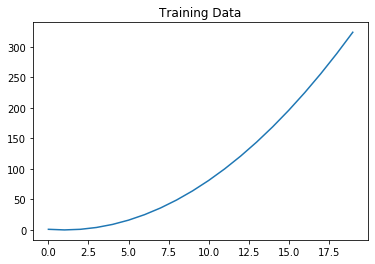

In [1]:
import numpy as np
import tensorflow as tf

from matplotlib import pyplot as plt
from tensorflow.data import Dataset

%matplotlib inline


# Number of points.

n = 20


# Dimensions.

d_in = 1
d_out = 1


# Create the data.

data = np.array([[x] for x in range(n)]).astype('float32')
target = np.array(
    [x**2 - 2*x + 1 for x in data]).astype('float32')


# Plot the data.

plt.plot(data[:,0], target)
plt.title('Training Data')

a: [[0.9657415]]
b: [[0.94129646]]
c: [1.5385755]

Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_initializable_iterator(dataset)`.
loss: 763.51611328125


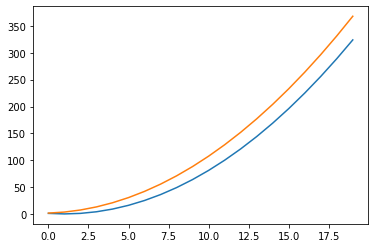

In [2]:
# Reset default graph and seed.

tf.reset_default_graph()
tf.set_random_seed(1)


# Create variables.

a = tf.get_variable('a', [d_in, d_out])
b = tf.get_variable('b', [d_in, d_out])
c = tf.get_variable('c', [d_out])


# Print the variables.

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(
        'a: {}\nb: {}\nc: {}\n'
        .format(*sess.run([a, b, c])))


# Create a dataset.

dataset = Dataset.from_tensors((data, target))
iterator = dataset.make_initializable_iterator()


# Get the data and labels from the dataset.

x, y = iterator.get_next()


# Define the model.

f = tf.matmul(x**2, a) + tf.matmul(x, b) + c


# Define the loss (least squares).

loss = tf.reduce_mean((f - y)**2)


# Run the model.
epochs = 2
with tf.Session() as sess:
    # Initialize variables and iterator.

    sess.run(tf.global_variables_initializer())

    for _ in range(epochs):
        sess.run(iterator.initializer)

        try:
            while True:

                # Run to get the outputs for f and loss.

                f_out, loss_out = sess.run([f, loss])
        except:
            pass
        
    print('loss: {}'.format(loss_out))
    
    
    # Plot the data against f.

    plt.plot(data[:,0], target)
    plt.plot(data[:,0], f_out)
    

loss: 29.156330108642578


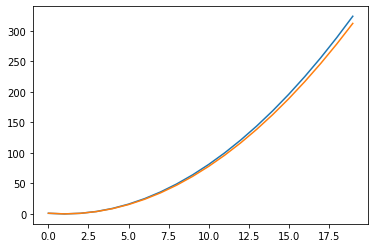

In [3]:
# Update the model to almost optimal parameters.
lr = 1e-3
a_update = a.assign(a + lr * np.array([[.99]]).astype('float32'))
b_update = b.assign(np.array([[-1.99]]).astype('float32'))
c_update = c.assign(np.array([1.1]).astype('float32'))

# Run the updated model.

with tf.Session() as sess:
    
    # Initialize variables and iterator.
    
    sess.run(tf.global_variables_initializer())
    sess.run(iterator.initializer)
    
    
    # Run to get the outputs for f and loss.
    
    _, _, _, f_out, loss_out = sess.run(
        [a_update, b_update, c_update, f, loss])
        
    print('loss: {}'.format(loss_out))
    
    
    # Plot the data against f.

    plt.plot(data[:,0], target)
    plt.plot(data[:,0], f_out)


# TensorFlow evaluation vs Python evaluation nuances

In [8]:
data = [1,2,3,4,5]
python_iter = iter(data)
type(python_iter)

list_iterator

In [74]:
total = 0
for num in python_iter:
    total += num
print(total)

15


In [9]:
python_iter = iter(data)
print(next(python_iter))
print(next(python_iter))
print(next(python_iter))

1
2
3


In [7]:
print(next(python_iter))
print(next(python_iter))
print(next(python_iter))

StopIteration: 

In [10]:
# Equivalent is using next explicitly. Need to catch the StopIteration exception though:
total = 0
try:
    while True:
        total += next(python_iter)
except StopIteration: pass
print(total)

9


## Now in tensorflow

In [11]:
tf_data = tf.data.Dataset.from_tensor_slices(data)
tf_iter = tf_data.make_initializable_iterator()
type(tf_iter)

Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_initializable_iterator(dataset)`.


tensorflow.python.data.ops.iterator_ops.Iterator

In [12]:
sess = tf.Session()
sess.run(tf_iter.initializer)

In [13]:
print(tf_iter.get_next())

Tensor("IteratorGetNext:0", shape=(), dtype=int32)


In [24]:
sess.run(tf_iter.initializer)

In [26]:
print(sess.run(tf_iter.get_next()))

2


In [203]:
print(sess.run(tf_iter.get_next()))
print(sess.run(tf_iter.get_next()))
print(sess.run(tf_iter.get_next()))
print(sess.run(tf_iter.get_next()))

2
3
4
5


In [204]:
print(sess.run(tf_iter.get_next()))

OutOfRangeError: End of sequence
	 [[node IteratorGetNext_77 (defined at /Users/piotrm/anaconda3/envs/fsdl/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py:1748) ]]

Original stack trace for 'IteratorGetNext_77':
  File "/Users/piotrm/anaconda3/envs/fsdl/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/piotrm/anaconda3/envs/fsdl/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/piotrm/anaconda3/envs/fsdl/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/piotrm/anaconda3/envs/fsdl/lib/python3.7/site-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/Users/piotrm/anaconda3/envs/fsdl/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 563, in start
    self.io_loop.start()
  File "/Users/piotrm/anaconda3/envs/fsdl/lib/python3.7/site-packages/tornado/platform/asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "/Users/piotrm/anaconda3/envs/fsdl/lib/python3.7/asyncio/base_events.py", line 538, in run_forever
    self._run_once()
  File "/Users/piotrm/anaconda3/envs/fsdl/lib/python3.7/asyncio/base_events.py", line 1782, in _run_once
    handle._run()
  File "/Users/piotrm/anaconda3/envs/fsdl/lib/python3.7/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "/Users/piotrm/anaconda3/envs/fsdl/lib/python3.7/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/Users/piotrm/anaconda3/envs/fsdl/lib/python3.7/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/Users/piotrm/anaconda3/envs/fsdl/lib/python3.7/site-packages/tornado/gen.py", line 787, in inner
    self.run()
  File "/Users/piotrm/anaconda3/envs/fsdl/lib/python3.7/site-packages/tornado/gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "/Users/piotrm/anaconda3/envs/fsdl/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 361, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/Users/piotrm/anaconda3/envs/fsdl/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/Users/piotrm/anaconda3/envs/fsdl/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 268, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/Users/piotrm/anaconda3/envs/fsdl/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/Users/piotrm/anaconda3/envs/fsdl/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 541, in execute_request
    user_expressions, allow_stdin,
  File "/Users/piotrm/anaconda3/envs/fsdl/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/Users/piotrm/anaconda3/envs/fsdl/lib/python3.7/site-packages/ipykernel/ipkernel.py", line 300, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/piotrm/anaconda3/envs/fsdl/lib/python3.7/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/piotrm/anaconda3/envs/fsdl/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2848, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/Users/piotrm/anaconda3/envs/fsdl/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2874, in _run_cell
    return runner(coro)
  File "/Users/piotrm/anaconda3/envs/fsdl/lib/python3.7/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "/Users/piotrm/anaconda3/envs/fsdl/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3051, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/piotrm/anaconda3/envs/fsdl/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3242, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/Users/piotrm/anaconda3/envs/fsdl/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3319, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-204-6487b829e061>", line 1, in <module>
    print(sess.run(tf_iter.get_next()))
  File "/Users/piotrm/anaconda3/envs/fsdl/lib/python3.7/site-packages/tensorflow_core/python/data/ops/iterator_ops.py", line 426, in get_next
    name=name)
  File "/Users/piotrm/anaconda3/envs/fsdl/lib/python3.7/site-packages/tensorflow_core/python/ops/gen_dataset_ops.py", line 2518, in iterator_get_next
    output_shapes=output_shapes, name=name)
  File "/Users/piotrm/anaconda3/envs/fsdl/lib/python3.7/site-packages/tensorflow_core/python/framework/op_def_library.py", line 794, in _apply_op_helper
    op_def=op_def)
  File "/Users/piotrm/anaconda3/envs/fsdl/lib/python3.7/site-packages/tensorflow_core/python/util/deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "/Users/piotrm/anaconda3/envs/fsdl/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py", line 3357, in create_op
    attrs, op_def, compute_device)
  File "/Users/piotrm/anaconda3/envs/fsdl/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py", line 3426, in _create_op_internal
    op_def=op_def)
  File "/Users/piotrm/anaconda3/envs/fsdl/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py", line 1748, in __init__
    self._traceback = tf_stack.extract_stack()


In [27]:
sess.run(tf_iter.initializer)
total = 0
try:
    while True:
        total += sess.run(tf_iter.get_next())
except tf.errors.OutOfRangeError: pass
print(total)

15


In [28]:
# What will this do?

python_iter = iter([1,2,3,4,5])
num = next(python_iter) + 100
print(num)
print(num)
print(num)

101
101
101


In [30]:
# What about in tensorflow?

tf_iter = tf.data\
            .Dataset.from_tensor_slices([1,2,3,4,5])\
            .make_initializable_iterator()
sess.run(tf_iter.initializer)

num = tf_iter.get_next() + 100
print(num)
print(sess.run(num))
print(sess.run(num))
print(sess.run(num))

Tensor("add_2:0", shape=(), dtype=int32)
101
102
103


In [31]:
# Lets compute sum of doubles and sum of squares simultaneously.

sum_doubles = 0
sum_squares = 0

python_iter = iter([1,2,3,4,5])

try:
    while True:
        num = next(python_iter)
        sum_doubles += num * 2
        sum_squares += num ** 2
except StopIteration: pass
        
print(f"doubles = {sum_doubles}")
print(f"squares = {sum_squares}")

doubles = 30
squares = 55


In [35]:
# Same in Tensorflow

sum_doubles = tf.Variable(initial_value=0, name="doubles")
sum_squares = tf.Variable(initial_value=0, name="squares")

sess.run(tf.global_variables_initializer()) # initializes sum_doubles, sum_squares
sess.run(tf_iter.initializer)
try:
    while True:
        num = tf_iter.get_next()
        sess.run(tf.assign(sum_doubles, sum_doubles + num * 2))
        sess.run(tf.assign(sum_squares, sum_squares + num ** 2))
        
except tf.errors.OutOfRangeError: pass

print(f"doubles = {sess.run(sum_doubles)}")
print(f"squares = {sess.run(sum_squares)}")

doubles = 45
squares = 0


In [36]:
sess.run(tf.global_variables_initializer()) # initializes sum_doubles, sum_squares
sess.run(tf_iter.initializer)
try:
    while True:
        num = tf_iter.get_next()
        sess.run([tf.assign(sum_doubles, sum_doubles + num * 2),
                  tf.assign(sum_squares, sum_squares + num ** 2)])
        
except tf.errors.OutOfRangeError: pass

print(f"doubles = {sess.run(sum_doubles)}")
print(f"squares = {sess.run(sum_squares)}")

doubles = 30
squares = 55


In [37]:
# Normally you should define these operations outside of the loop and reuse them.

num = tf_iter.get_next()
add_double_op = tf.assign(sum_doubles, sum_doubles + num * 2)
add_square_op = tf.assign(sum_squares, sum_squares + num ** 2)

sess.run(tf.global_variables_initializer()) # initializes sum_doubles, sum_squares
sess.run(tf_iter.initializer)

try:
    while True:
        print(sess.run([add_double_op, add_square_op]))
        
except tf.errors.OutOfRangeError: pass

print(f"doubles = {sess.run(sum_doubles)}")
print(f"squares = {sess.run(sum_squares)}")

[2, 1]
[6, 5]
[12, 14]
[20, 30]
[30, 55]
doubles = 30
squares = 55



## *Keras*

Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research.

Use Keras if you need a deep learning library that:

- Allows for easy and fast prototyping (through user friendliness, modularity, and extensibility).
- Supports both convolutional networks and recurrent networks, as well as combinations of the two.
- Runs seamlessly on CPU and GPU.







Epoch 1/30






Using TensorFlow backend.



20/20 [==============================] - 0s 20ms/step - loss: 27.6803
Epoch 2/30
20/20 [==============================] - 0s 69us/step - loss: 26.7697
Epoch 3/30
20/20 [==============================] - 0s 64us/step - loss: 25.8591
Epoch 4/30
20/20 [==============================] - 0s 64us/step - loss: 24.9485
Epoch 5/30
20/20 [==============================] - 0s 67us/step - loss: 24.0379
Epoch 6/30
20/20 [==============================] - 0s 55us/step - loss: 23.1273
Epoch 7/30
20/20 [==============================] - 0s 58us/step - loss: 22.2167
Epoch 8/30
20/20 [==============================] - 0s 55us/step - loss: 21.3061
Epoch 9/30
20/20 [==============================] - 0s 63us/step - loss: 20.3955
Epoch 10/30
20/20 [==============================] - 0s 60us/step - loss: 19.4849
Epoch 11/30
20/20 [==============================] - 0s 68us/step - loss: 18.5743
Epoch 12/30
20/20 [==============================] - 0s 93us/step - loss: 17.6637
Epoch 13/30
20/20 [================

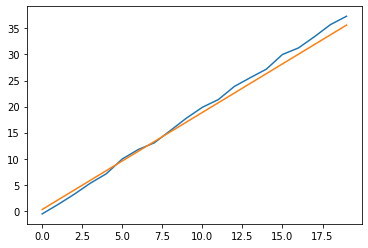

In [4]:
import numpy as np

from keras.layers import Activation, Dense, Input
from keras.models import Model
from matplotlib import pyplot as plt

%matplotlib inline

# We are going to make a linear regression model.
n = 20
data = np.array([[x] for x in range(n)])
target = np.array([2*x - 1 + np.random.rand() for x in data])

d_in = 1
d_out = 1

x = Input((d_in,))
f = Dense(d_out)(x)
f = Activation('linear')(f)

model = Model(x, f)

model.compile(optimizer='sgd', loss='mae')

model.fit(data, target, epochs=30)

y_pred = model.predict(data)

plt.plot(data[:,0], target)
plt.plot(data[:,0], y_pred)